<a href="https://colab.research.google.com/github/raj-gupta1/CIFAR10_CNN_keras_Implementation/blob/main/HW_CNN_5VARIENTS_CIFAR10_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**CIFAR-10 DATASET IMPLEMENTATION IN CNN** 

#1. IMPORTING THE  CIFAR-10 DATASET

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
%matplotlib inline

In [2]:
from keras.datasets import cifar10

(x_train, y_train) , (x_test, y_test) = cifar10.load_data()
print("length of training dataset is %d"  % len(x_train))
print("length of testing dataset is %d" % len(x_test))

170508288/170498071 [==============================] - 2s 0us/step
length of training dataset is 50000
length of testing dataset is 10000


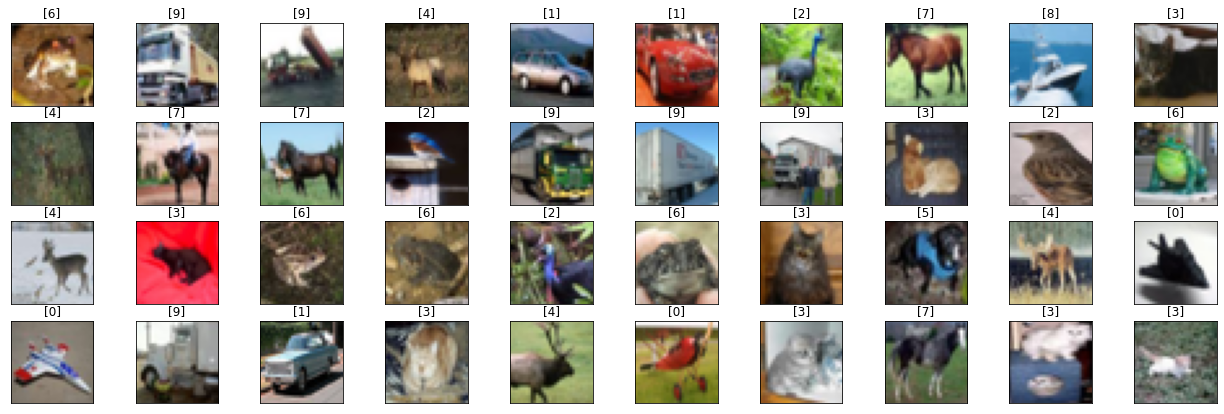

In [3]:
fig = plt.figure(figsize=(22,7))
for i in range(40):
  ax = fig.add_subplot(4,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]))
  ax.set_title(str(y_train[i]))



#2. RESCALING THE IMAGE TO DECREASE TRAINING TIME

In [4]:
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255

print("x_train shape is" ,x_train.shape)
print("x_test shape is " , x_test.shape)

x_train shape is (50000, 32, 32, 3)
x_test shape is  (10000, 32, 32, 3)


#3. SPLITTING THE DATASET INTO TRAIN, TEST, VALIDATION 

In [5]:
from keras.utils import np_utils
from tensorflow import keras

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]


print(x_train.shape , 'x_train shape ')
print()

print(x_train.shape, 'train samples')
print(x_test.shape,  'test samples')
print(x_valid.shape, 'validate samples')

(45000, 32, 32, 3) x_train shape 

(45000, 32, 32, 3) train samples
(10000, 32, 32, 3) test samples
(5000, 32, 32, 3) validate samples


#**4. CREATING THE MODEL**

#MODEL 1

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Dropout(0.3))
model1.add(Flatten())

model1.add(Dense(500, activation='relu'))
model1.add(Dropout(0.4))

model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

#5. COMPILING THE MODEL



In [7]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#6. TRAINING THE MODEL



In [8]:
from keras.callbacks import ModelCheckpoint 

path = 'model1.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath=path, verbose=1, save_best_only=True)

hist = model1.fit(x_train, y_train, batch_size=64, epochs=10,
                  validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                  verbose=2, shuffle=True)

Epoch 1/10
704/704 - 34s - loss: 1.6214 - accuracy: 0.4125 - val_loss: 1.2984 - val_accuracy: 0.5360

Epoch 00001: val_loss improved from inf to 1.29835, saving model to model1.weights.best.hdf5
Epoch 2/10
704/704 - 4s - loss: 1.2908 - accuracy: 0.5383 - val_loss: 1.1249 - val_accuracy: 0.5986

Epoch 00002: val_loss improved from 1.29835 to 1.12490, saving model to model1.weights.best.hdf5
Epoch 3/10
704/704 - 4s - loss: 1.1744 - accuracy: 0.5826 - val_loss: 1.0438 - val_accuracy: 0.6384

Epoch 00003: val_loss improved from 1.12490 to 1.04377, saving model to model1.weights.best.hdf5
Epoch 4/10
704/704 - 4s - loss: 1.0939 - accuracy: 0.6116 - val_loss: 0.9960 - val_accuracy: 0.6502

Epoch 00004: val_loss improved from 1.04377 to 0.99602, saving model to model1.weights.best.hdf5
Epoch 5/10
704/704 - 4s - loss: 1.0220 - accuracy: 0.6366 - val_loss: 0.9271 - val_accuracy: 0.6662

Epoch 00005: val_loss improved from 0.99602 to 0.92709, saving model to model1.weights.best.hdf5
Epoch 6/10
70

#7. Loading the Model with the Best Classification Accuracy on the Validation Set

In [9]:
model1.load_weights(path)

#8. Calculating the model accuracy on test data

In [10]:
score = model1.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 71.5900% 


#MODEL 2

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential()

model2.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3))) # 32*32*16
model2.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))      # 32*32*16
model2.add(MaxPooling2D(pool_size=2))                                                 # 16*16*16

model2.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))      # 16*16*32
model2.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))      # 16*16*32
model2.add(MaxPooling2D(pool_size=2))                                                 #  8*8*32
model2.add(Dropout(0.3))                                                              #  8*8*32

model2.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))       # 8*8*64
model2.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))       # 8*8*64
model2.add(MaxPooling2D(pool_size=2))                                                  # 4*4*64

model2.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))      # 4*4*128
model2.add(MaxPooling2D(pool_size=2))                                                  # 2*2*128

model2.add(Flatten())

model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.4))

model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 16)        1040      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)         

In [12]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint 

path = 'model2.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath=path, verbose=1, save_best_only=True)

hist = model2.fit(x_train, y_train, batch_size=64, epochs=15,
                  validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                  verbose=2, shuffle=True)

Epoch 1/15
704/704 - 10s - loss: 1.8055 - accuracy: 0.3232 - val_loss: 1.5587 - val_accuracy: 0.4210

Epoch 00001: val_loss improved from inf to 1.55869, saving model to model2.weights.best.hdf5
Epoch 2/15
704/704 - 8s - loss: 1.4271 - accuracy: 0.4775 - val_loss: 1.2759 - val_accuracy: 0.5372

Epoch 00002: val_loss improved from 1.55869 to 1.27592, saving model to model2.weights.best.hdf5
Epoch 3/15
704/704 - 8s - loss: 1.2738 - accuracy: 0.5376 - val_loss: 1.1341 - val_accuracy: 0.5894

Epoch 00003: val_loss improved from 1.27592 to 1.13408, saving model to model2.weights.best.hdf5
Epoch 4/15
704/704 - 8s - loss: 1.1716 - accuracy: 0.5757 - val_loss: 1.0766 - val_accuracy: 0.6124

Epoch 00004: val_loss improved from 1.13408 to 1.07657, saving model to model2.weights.best.hdf5
Epoch 5/15
704/704 - 8s - loss: 1.0968 - accuracy: 0.6045 - val_loss: 1.0264 - val_accuracy: 0.6344

Epoch 00005: val_loss improved from 1.07657 to 1.02640, saving model to model2.weights.best.hdf5
Epoch 6/15
70

In [14]:
model2.load_weights(path)

In [15]:
score = model2.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 70.9100% 


#MODEL 3

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model3 = Sequential()

model3.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3))) # 32*32*16
model3.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))      
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))                                                

model3.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))      
model3.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))      
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))                                                 
model3.add(Dropout(0.1))                                                              

model3.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))       
model3.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))       
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))                                                  

model3.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))      
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))                                                  

model3.add(Flatten())

model3.add(Dense(500, activation='relu'))
model3.add(Dropout(0.2))

model3.add(BatchNormalization())
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 16)        1040      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        4128      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)       

In [17]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint 

path = 'model3.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath=path, verbose=1, save_best_only=True)

hist = model3.fit(x_train, y_train, batch_size=64, epochs=30,
                  validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                  verbose=2, shuffle=True)

model3.load_weights(path)

Epoch 1/30
704/704 - 11s - loss: 1.5912 - accuracy: 0.4393 - val_loss: 1.3166 - val_accuracy: 0.5192

Epoch 00001: val_loss improved from inf to 1.31655, saving model to model3.weights.best.hdf5
Epoch 2/30
704/704 - 9s - loss: 1.1556 - accuracy: 0.5860 - val_loss: 1.7655 - val_accuracy: 0.4052

Epoch 00002: val_loss did not improve from 1.31655
Epoch 3/30
704/704 - 9s - loss: 0.9821 - accuracy: 0.6508 - val_loss: 1.2186 - val_accuracy: 0.5752

Epoch 00003: val_loss improved from 1.31655 to 1.21859, saving model to model3.weights.best.hdf5
Epoch 4/30
704/704 - 9s - loss: 0.8772 - accuracy: 0.6895 - val_loss: 1.1109 - val_accuracy: 0.6122

Epoch 00004: val_loss improved from 1.21859 to 1.11091, saving model to model3.weights.best.hdf5
Epoch 5/30
704/704 - 9s - loss: 0.7952 - accuracy: 0.7176 - val_loss: 0.9396 - val_accuracy: 0.6708

Epoch 00005: val_loss improved from 1.11091 to 0.93961, saving model to model3.weights.best.hdf5
Epoch 6/30
704/704 - 9s - loss: 0.7258 - accuracy: 0.7427 -

In [18]:
score = model3.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 75.1300% 


#MODEL 4

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model4 = Sequential()

model4.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(32, 32, 3))) # 32*32*32
model4.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu'))     
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=2))                                                 

model4.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu'))     
model4.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))      
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=2))                                                
model4.add(Dropout(0.1))                                                              

model4.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))      
model4.add(BatchNormalization())    
model4.add(Dropout(0.2))                                             

model4.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))     
model4.add(BatchNormalization())
model4.add(Dropout(0.2))  

model4.add(Flatten())

model4.add(Dense(500, activation='elu'))
model4.add(Dropout(0.3))

model4.add(Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 12, 12, 64)       

In [20]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint 

path = 'model4.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath=path, verbose=1, save_best_only=True)

hist = model4.fit(x_train, y_train, batch_size=64, epochs=30,
                  validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                  verbose=2, shuffle=True)

model4.load_weights(path)

Epoch 1/30
704/704 - 9s - loss: 1.6920 - accuracy: 0.4193 - val_loss: 1.3642 - val_accuracy: 0.5080

Epoch 00001: val_loss improved from inf to 1.36420, saving model to model4.weights.best.hdf5
Epoch 2/30
704/704 - 8s - loss: 1.1726 - accuracy: 0.5828 - val_loss: 1.2588 - val_accuracy: 0.5636

Epoch 00002: val_loss improved from 1.36420 to 1.25877, saving model to model4.weights.best.hdf5
Epoch 3/30
704/704 - 7s - loss: 0.9705 - accuracy: 0.6565 - val_loss: 0.9589 - val_accuracy: 0.6654

Epoch 00003: val_loss improved from 1.25877 to 0.95893, saving model to model4.weights.best.hdf5
Epoch 4/30
704/704 - 7s - loss: 0.8576 - accuracy: 0.6968 - val_loss: 1.1618 - val_accuracy: 0.5994

Epoch 00004: val_loss did not improve from 0.95893
Epoch 5/30
704/704 - 8s - loss: 0.7841 - accuracy: 0.7235 - val_loss: 1.1378 - val_accuracy: 0.6306

Epoch 00005: val_loss did not improve from 0.95893
Epoch 6/30
704/704 - 7s - loss: 0.7268 - accuracy: 0.7440 - val_loss: 0.7537 - val_accuracy: 0.7374

Epoch

In [21]:
score = model4.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 79.3000% 


#MODEL 5

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model5 = Sequential()

model5.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(32, 32, 3))) # 30*30*32
model5.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))  # 30*30*32
model5.add(BatchNormalization())   # 30*30*32

model5.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))  
model5.add(MaxPooling2D(pool_size=2))                                                 
model5.add(Dropout(0.1))

model5.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))     
model5.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))      
model5.add(BatchNormalization())

model5.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=2))                                                
model5.add(Dropout(0.1))                                                              

model5.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))
model5.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))       
model5.add(BatchNormalization())    

model5.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=2))                                                
model5.add(Dropout(0.1))                                            
 
model5.add(Flatten())

model5.add(Dense(512, activation='relu'))

model5.add(Dense(10, activation='softmax'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 64)       

In [23]:
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint 

path = 'model5.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath=path, verbose=1, save_best_only=True)

hist = model5.fit(x_train, y_train, batch_size=32, epochs=30,
                  validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                  verbose=2, shuffle=True)

model5.load_weights(path)

Epoch 1/30
1407/1407 - 25s - loss: 1.4019 - accuracy: 0.4887 - val_loss: 1.1787 - val_accuracy: 0.5658

Epoch 00001: val_loss improved from inf to 1.17867, saving model to model5.weights.best.hdf5
Epoch 2/30
1407/1407 - 23s - loss: 0.9754 - accuracy: 0.6549 - val_loss: 1.0515 - val_accuracy: 0.6468

Epoch 00002: val_loss improved from 1.17867 to 1.05152, saving model to model5.weights.best.hdf5
Epoch 3/30
1407/1407 - 23s - loss: 0.8138 - accuracy: 0.7168 - val_loss: 1.0154 - val_accuracy: 0.6544

Epoch 00003: val_loss improved from 1.05152 to 1.01538, saving model to model5.weights.best.hdf5
Epoch 4/30
1407/1407 - 23s - loss: 0.7204 - accuracy: 0.7520 - val_loss: 0.9300 - val_accuracy: 0.6898

Epoch 00004: val_loss improved from 1.01538 to 0.92998, saving model to model5.weights.best.hdf5
Epoch 5/30
1407/1407 - 23s - loss: 0.6489 - accuracy: 0.7743 - val_loss: 0.7310 - val_accuracy: 0.7516

Epoch 00005: val_loss improved from 0.92998 to 0.73096, saving model to model5.weights.best.hdf5

In [24]:
score = model5.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 79.4800% 
